# Import Libraries :

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import joblib

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Read Data :

In [3]:
data=pd.read_csv("/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv", encoding='latin-1')


# EDA:

In [4]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [7]:
data.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

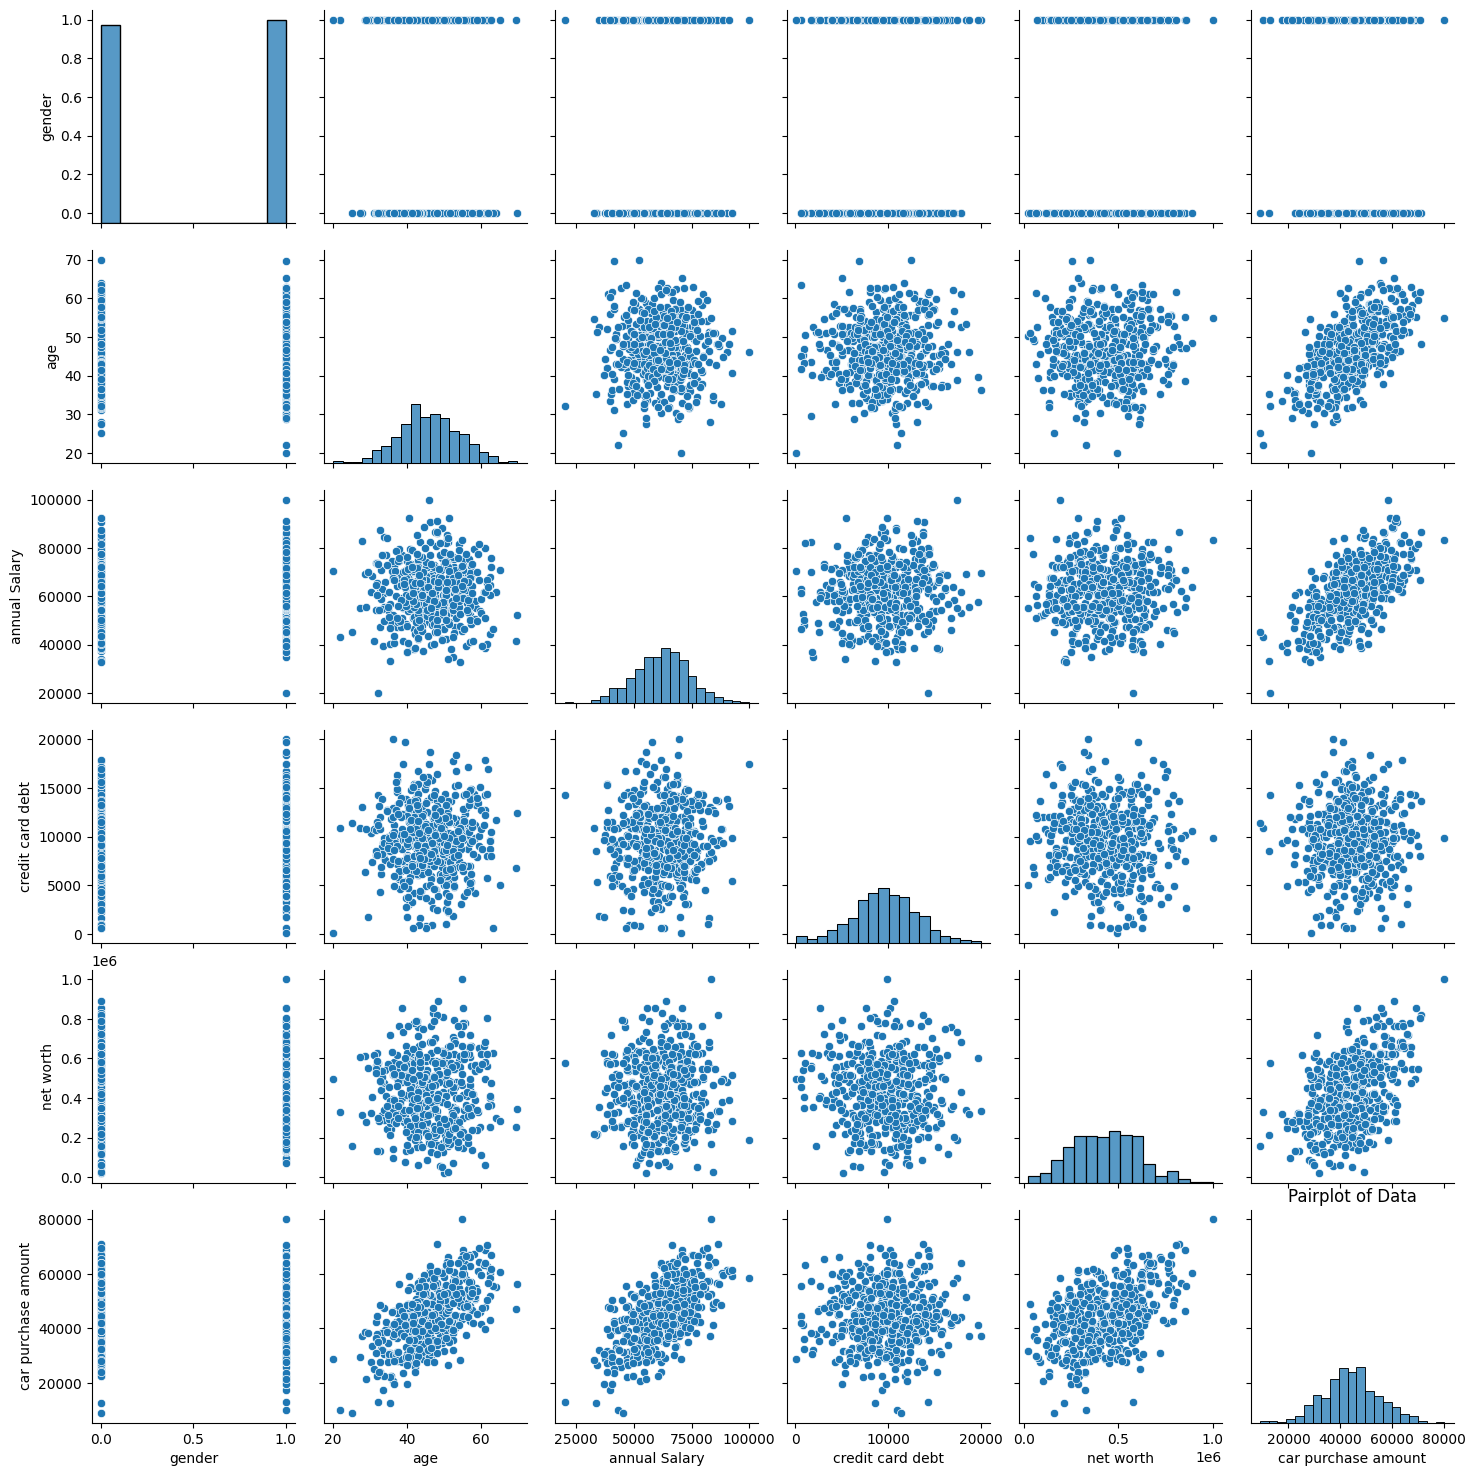

In [8]:
sns.pairplot(data)
plt.title('Pairplot of Data')
plt.show()

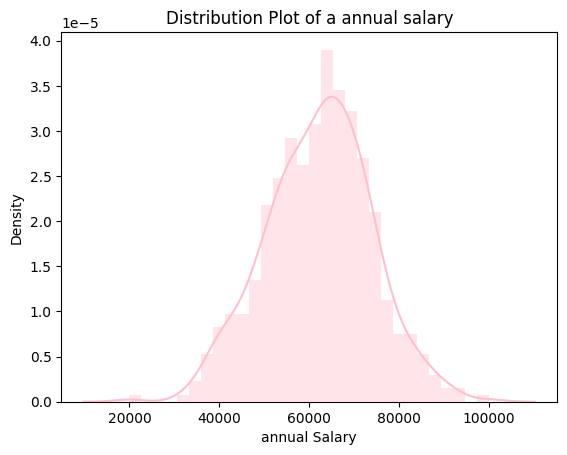

In [9]:
sns.distplot(data['annual Salary'], kde=True, bins=30, color='pink')
plt.title('Distribution Plot of a annual salary')
plt.show()

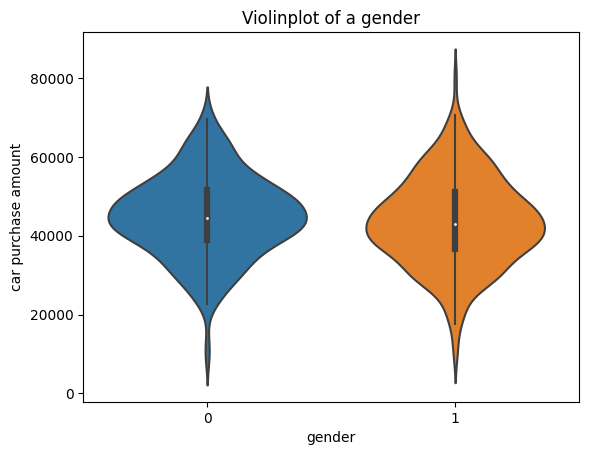

In [10]:
sns.violinplot(x='gender', y='car purchase amount', data=data)
plt.title('Violinplot of a gender')
plt.show()

In [11]:
columns = [col for col in data.columns if data[col].dtype == 'object']

for col in columns:
    print(data[col].value_counts(),"\n")


customer name
Seth                    2
Walter                  2
Martina Avila           1
Sexton, Shaeleigh H.    1
Holloway, Brennan Q.    1
                       ..
Holmes Irwin            1
Hector Price            1
Sebastian Marks         1
Marvin Garner           1
Marla                   1
Name: count, Length: 498, dtype: int64 

customer e-mail
cubilia.Curae.Phasellus@quisaccumsanconvallis.edu    1
mi.eleifend.egestas@cursuset.net                     1
ut@Etiamvestibulum.ca                                1
nunc.sed.pede@Quisqueporttitor.net                   1
Cras.eu@vitaevelitegestas.net                        1
                                                    ..
Nunc.sed.orci@Namligulaelit.net                      1
Aliquam.nisl@semegetmassa.co.uk                      1
et.eros@feugiatmetussit.net                          1
in@sed.org                                           1
Camaron.marla@hotmail.com                            1
Name: count, Length: 500, dtype: int64

# Pre-Processing Operations :

In [12]:
data_for_model=data.drop(columns=["customer e-mail","customer name"])

In [13]:
data_for_model

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
495,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [14]:
data_for_model.country=LabelEncoder().fit_transform(data_for_model.country)

In [15]:
data_for_model

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,27,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,17,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,41,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,26,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
495,128,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,208,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,144,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,24,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [16]:
Features=data_for_model.drop(columns="car purchase amount")
Prediction=data_for_model["car purchase amount"]

In [17]:
Features

,country,gender,age,annual Salary,credit card debt,net worth
0,27,0,41.851720,62812.09301,11609.380910,238961.2505
1,17,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,1,43.152897,53798.55112,11160.355060,638467.1773
3,41,1,58.271369,79370.03798,14426.164850,548599.0524
4,26,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...,...
495,128,0,41.462515,71942.40291,6995.902524,541670.1016
496,208,1,37.642000,56039.49793,12301.456790,360419.0988
497,144,1,53.943497,68888.77805,10611.606860,764531.3203
498,24,1,59.160509,49811.99062,14013.034510,337826.6382


In [18]:
Prediction

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64

In [19]:
Scaled_Features=pd.DataFrame(MinMaxScaler().fit_transform(Features))

In [20]:
Scaled_Features

,0,1,2,3,4,5
0,0.128571,0.0,0.437034,0.535151,0.578361,0.223430
1,0.080952,0.0,0.417412,0.583086,0.476028,0.521402
2,0.004762,1.0,0.463058,0.422482,0.555797,0.631089
3,0.195238,1.0,0.765427,0.742125,0.719908,0.539387
4,0.123810,1.0,0.746275,0.496614,0.264257,0.551331
...,...,...,...,...,...,...
495,0.609524,0.0,0.429250,0.649280,0.346528,0.532316
496,0.990476,1.0,0.352840,0.450494,0.613139,0.347366
497,0.685714,1.0,0.678870,0.611110,0.528221,0.759726
498,0.114286,1.0,0.783210,0.372650,0.699147,0.324313


In [21]:
Scaled_Features.columns = ["country", "gender", "age", "annual Salary", "credit card debt", "net worth"]

In [22]:
Scaled_Features

,country,gender,age,annual Salary,credit card debt,net worth
0,0.128571,0.0,0.437034,0.535151,0.578361,0.223430
1,0.080952,0.0,0.417412,0.583086,0.476028,0.521402
2,0.004762,1.0,0.463058,0.422482,0.555797,0.631089
3,0.195238,1.0,0.765427,0.742125,0.719908,0.539387
4,0.123810,1.0,0.746275,0.496614,0.264257,0.551331
...,...,...,...,...,...,...
495,0.609524,0.0,0.429250,0.649280,0.346528,0.532316
496,0.990476,1.0,0.352840,0.450494,0.613139,0.347366
497,0.685714,1.0,0.678870,0.611110,0.528221,0.759726
498,0.114286,1.0,0.783210,0.372650,0.699147,0.324313


# Splitting data to train and test groubs :

In [23]:
Features_train, Features_test, Prediction_train, Prediction_test = train_test_split(Features, Prediction, test_size=0.2, random_state=42)

# Performing GridSearch Model :
### to find the best parameters of Linear Regression model 

In [24]:
LR=LinearRegression()
parameters = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive':[True,False]}


grid_search = GridSearchCV(LR, parameters, cv=5)
grid_search.fit(Features_train, Prediction_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best Score: 0.9999999801159781


# Train model and Predict values :

In [25]:
LR=LinearRegression(fit_intercept=True,copy_X=True,positive=True)
LR.fit(Features_train,Prediction_train)
predicted=LR.predict(Features_test)

In [26]:
predicted

array([46084.53169375, 45060.3685257 , 63081.7350102 , 31838.11784716,
       60460.9427339 , 63138.0899944 , 52480.08328838, 54757.65079652,
       52707.09646721, 47869.29118953, 38187.83557414, 56229.50752791,
       44361.35919091, 39003.01576312, 39977.54794714, 55173.67168296,
       48901.07928469, 17584.47453408, 60528.39914308, 49991.38417675,
       41351.93390345, 52785.98432444, 51732.07494168, 38043.04388828,
       41355.15481921, 38241.63098771, 64146.74170982, 47988.35857447,
       22682.12492195, 52243.0849398 , 55167.97628297, 45859.28661971,
       41148.99643283, 57430.5784201 , 42926.25671994, 39892.05391997,
       61731.88909154, 30840.46478236, 42210.36119265, 40095.62882381,
       57302.15229407, 60670.33005498, 47443.21603461, 36638.44062219,
       53489.23952536, 44433.7720156 , 35320.77250984, 42289.69369371,
       52056.95292373, 47241.64287624, 41904.62340792, 32608.41792194,
       38242.59418491, 41767.47042914, 45207.59510165, 48100.22506251,
      

# Evaluate Model :

In [27]:
R2Score=r2_score(Prediction_test, predicted)

In [28]:
R2Score

0.9999999810273109

# Save model as 'sav' file :

In [29]:
joblib.dump(LR,"LinearRegressionModel-IEEE #1 Task.sav")

['LinearRegressionModel-IEEE #1 Task.sav']